### Imports

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Exploring the dataset

In [54]:
data = pd.read_csv('./train.csv')
print(data.shape)

data.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
data["label"].unique() # Multi-class classification problem

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

<Axes: ylabel='Frequency'>

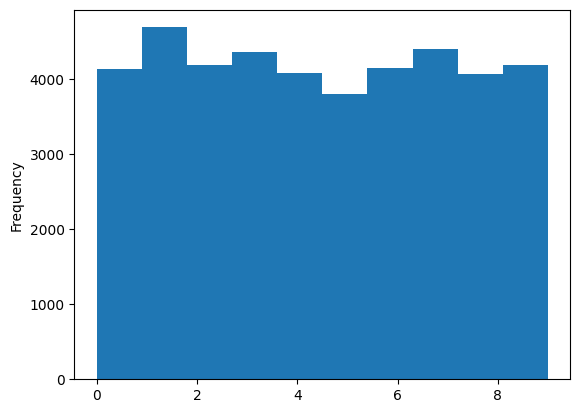

In [56]:
data["label"].plot(kind='hist')

In [57]:
type(data) # DataFrame

pandas.core.frame.DataFrame

In [58]:
data = np.array(data)
m, n = data.shape 
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape

In [59]:
Y_train.shape

(41000,)

### Initialize weights and biases

In [60]:
W1 = np.random.rand(10, 784) * 0.5
b1 = np.random.rand(10, 1) * 0.5

W2 = np.random.rand(10, 10) * 0.5
b2 = np.random.rand(10, 1) * 0.5

In [61]:
W1.shape, b1.shape, W2.shape, b2.shape

((10, 784), (10, 1), (10, 10), (10, 1))

In [62]:
def init_params():
    W1 = np.random.rand(10, 784) * 0.5
    b1 = np.random.rand(10, 1) * 0.5
    W2 = np.random.rand(10, 10) * 0.5
    b2 = np.random.rand(10, 1) * 0.5
    
    return W1, b1, W2, b2 


In [63]:
def softmax(Z):
    return np.exp(Z) / np.sum(np.exp(Z))

def ReLU(Z):
    return np.maximum(Z,0)

* Vanishing Gradient
* Exploding Gradient

![Sigmoid](https://hvidberrrg.github.io/deep_learning/activation_functions/assets/sigmoid_function.pngm
)

* Forward Propagation

In [64]:
def forward_prop(X,W1,b1,W2,b2):
    Z1 = W1.dot(X)+b1 # first layer
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) +b2 # second layer
    A2 = softmax(Z2) # probabilities
    return Z1, A1, Z2, A2

* Encoding

In [65]:
def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

* Backward Propagation

In [66]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

* Updating params

In [67]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2


In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

# Iterative optimization algorithm to find best parameters (weights and biases)
# To minimize the cost/loss function
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2


In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)


### Feature Engineering
* Transforming raw data into relevant, informative features that ML model can use effectively.
  
1. Data Cleaning and Imputation
   1. Handling missing data
   2. Outliers handling
   3. Data type conversion  (strings -> numerical; boolean -> numerical)
2. Feature Transformation
   1. Feature Scaling/Normalization
   2. Encoding categorical variables
   